### Projet TSP

In [43]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from math import dist

In [69]:
class SolverTSP:
    def __init__(self, position):
        self.position = position
        self.distance = cdist(position,position)
    
    def Cost(self):
        Total_cost = np.sum(self.Solve()[1])
        return(Total_cost)
    
    def Solve(self):
        # permutation optimale
        nbville = len(self.position)
        actuel = 0
        ppv = [actuel] # prochain point de vente
        cout = []
        for i in range(0,nbville-1):
            selection = min(np.delete(self.distance[ppv[-1]],ppv))
            cout.append(selection)
            ppv.append(np.where(self.distance[ppv[-1]] == selection)[0][0])
        dist = self.distance[ppv[0]][ppv[-1]]
        cout.append(dist)
        return(ppv , cout)
    
    def dessine_tour(self):
        Total_cost = self.Cost()
        permutations = self.Solve()[0]
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        ax.plot(self.position[permutations, 0], self.position[permutations, 1], 'b-o') #trâce tous les (x, y) dans l'ordre des permutations
        ax.plot([self.position[permutations[0], 0], self.position[permutations[-1], 0]],
                [self.position[permutations[0], 1], self.position[permutations[-1], 1]], 'b-o') # ajoute la ligne entre la 1ère et dernière ligne
        for i, txt in enumerate(range(0, len(self.position))):
            ax.annotate(txt, (self.position[i, 0], self.position[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
        plt.title(f"Total cost Solver 1 : {Total_cost}")
        return (ax)

### Now we test our solution : 

[[0.90748822 0.61344174]
 [0.07949626 0.89903568]
 [0.33359562 0.71817175]
 [0.11631327 0.34945675]
 [0.70158999 0.76522524]
 [0.36413969 0.35652765]
 [0.79129801 0.02854209]
 [0.81705008 0.60381609]
 [0.32666945 0.43498254]
 [0.81397849 0.91246305]
 [0.14652193 0.50678355]
 [0.45830349 0.59268728]
 [0.22810427 0.83653458]
 [0.73322949 0.89371255]
 [0.74771851 0.70255047]
 [0.11293195 0.45818823]
 [0.9543251  0.47153663]
 [0.3497459  0.95834711]
 [0.46425944 0.40284991]
 [0.96463266 0.05783278]
 [0.85590554 0.33931079]
 [0.75184419 0.85525019]
 [0.2114477  0.02050789]
 [0.77585229 0.7778813 ]
 [0.68812823 0.31612551]
 [0.80532711 0.94159274]
 [0.28526342 0.11277884]
 [0.17720052 0.12936154]
 [0.41129904 0.67949727]
 [0.85396332 0.35490675]
 [0.75336759 0.62766411]
 [0.22660088 0.51746932]
 [0.16952715 0.33792179]
 [0.91311518 0.51784899]
 [0.11999876 0.68258739]
 [0.78501321 0.27521111]
 [0.08314262 0.22262975]
 [0.46626922 0.42378863]
 [0.22273563 0.02928301]
 [0.73839549 0.42463583]


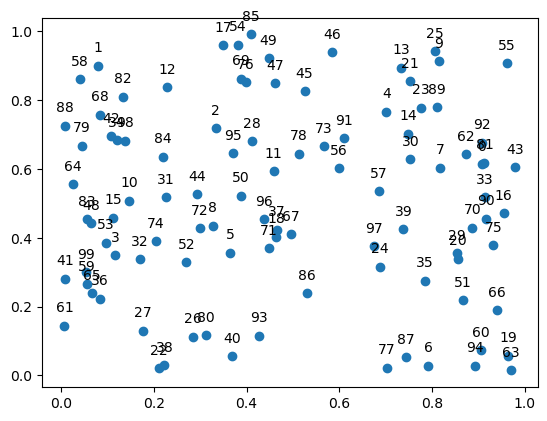

In [70]:
nbville = 100
position = np.random.uniform(0, 1, size=(nbville,2))
print(position)

plt.plot(position[:, 0], position[:, 1], 'o')
for i, txt in enumerate(range(0, nbville)):
    plt.annotate(txt, (position[i, 0], position[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

The matrix of distances is : [[0.         0.87586219 0.58337046 ... 0.33309849 0.77315097 0.91008013]
 [0.87586219 0.         0.3118946  ... 0.79331565 0.22458709 0.59998724]
 [0.58337046 0.3118946  0.         ... 0.4841454  0.19950884 0.5037753 ]
 ...
 [0.33309849 0.79331565 0.4841454  ... 0.         0.61916608 0.62631509]
 [0.77315097 0.22458709 0.19950884 ... 0.61916608 0.         0.39156527]
 [0.91008013 0.59998724 0.5037753  ... 0.62631509 0.39156527 0.        ]] 

The cities to visit are : [[0.90748822 0.61344174]
 [0.07949626 0.89903568]
 [0.33359562 0.71817175]
 [0.11631327 0.34945675]
 [0.70158999 0.76522524]
 [0.36413969 0.35652765]
 [0.79129801 0.02854209]
 [0.81705008 0.60381609]
 [0.32666945 0.43498254]
 [0.81397849 0.91246305]
 [0.14652193 0.50678355]
 [0.45830349 0.59268728]
 [0.22810427 0.83653458]
 [0.73322949 0.89371255]
 [0.74771851 0.70255047]
 [0.11293195 0.45818823]
 [0.9543251  0.47153663]
 [0.3497459  0.95834711]
 [0.46425944 0.40284991]
 [0.96463266 0.05783278]

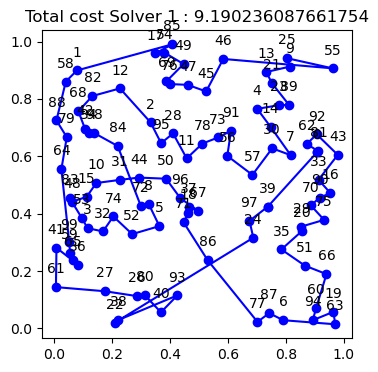

In [71]:
x = SolverTSP(position)

print(f'The matrix of distances is : {x.distance} \n')

print(f'The cities to visit are : {x.position} \n')

perm = x.Solve()[0]
print(f'The sequence of the traveled cities is : {perm} \n')

cout = x.Cost()
print(f'The total distance traveled is {cout}\n')

draw = x.dessine_tour()
print(f'The drawing of the route is as follows {draw} \n')

### Solution bis 

In [72]:
class SolverTSP2:
    def __init__(self, position):
        self.position = position
        self.distance = cdist(position,position)
    
    def Solve(self):
        # permutation optimale
        Totalcost = []
        Totalppv = []
        nbville = len(position)
        for j in range (0, nbville):
            actuel = j
            ppv = [actuel] # prochain point de vente
            cout = []
            for i in range(0,nbville-1):
                selection = min(np.delete(self.distance[ppv[-1]],ppv))
                cout.append(selection)
                ppv.append(np.where(self.distance[ppv[-1]] == selection)[0][0])
            dist = self.distance[ppv[0]][ppv[-1]]
            cout.append(dist)
            Totalcost.append(np.sum(cout))
            Totalppv.append(ppv)
        mincost = min(Totalcost) 
        index = Totalcost.index(mincost)
        optimalppv = Totalppv[index]
        return(optimalppv , mincost)
    
    def dessine_tour(self):
        mincost = self.Solve()[1]
        permutations = self.Solve()[0]
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        ax.plot(self.position[permutations, 0], self.position[permutations, 1], 'b-o') #trâce tous les (x, y) dans l'ordre des permutations
        ax.plot([self.position[permutations[0], 0], self.position[permutations[-1], 0]],
                [self.position[permutations[0], 1], self.position[permutations[-1], 1]], 'b-o') # ajoute la ligne entre la 1ère et dernière ligne
        for i, txt in enumerate(range(0, len(self.position))):
            ax.annotate(txt, (self.position[i, 0], self.position[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
        plt.title(f"Total cost Solver 2 : {mincost}")
        return (ax)

The matrix of distances is : [[0.         0.87586219 0.58337046 ... 0.33309849 0.77315097 0.91008013]
 [0.87586219 0.         0.3118946  ... 0.79331565 0.22458709 0.59998724]
 [0.58337046 0.3118946  0.         ... 0.4841454  0.19950884 0.5037753 ]
 ...
 [0.33309849 0.79331565 0.4841454  ... 0.         0.61916608 0.62631509]
 [0.77315097 0.22458709 0.19950884 ... 0.61916608 0.         0.39156527]
 [0.91008013 0.59998724 0.5037753  ... 0.62631509 0.39156527 0.        ]] 

The cities to visit are : [[0.90748822 0.61344174]
 [0.07949626 0.89903568]
 [0.33359562 0.71817175]
 [0.11631327 0.34945675]
 [0.70158999 0.76522524]
 [0.36413969 0.35652765]
 [0.79129801 0.02854209]
 [0.81705008 0.60381609]
 [0.32666945 0.43498254]
 [0.81397849 0.91246305]
 [0.14652193 0.50678355]
 [0.45830349 0.59268728]
 [0.22810427 0.83653458]
 [0.73322949 0.89371255]
 [0.74771851 0.70255047]
 [0.11293195 0.45818823]
 [0.9543251  0.47153663]
 [0.3497459  0.95834711]
 [0.46425944 0.40284991]
 [0.96463266 0.05783278]

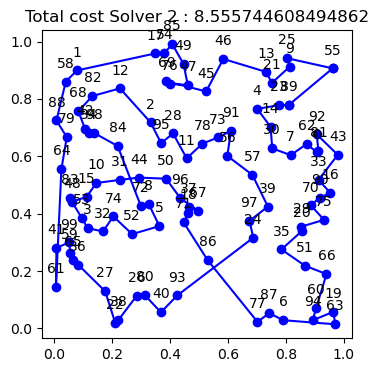

In [73]:
x2 = SolverTSP2(position)

print(f'The matrix of distances is : {x2.distance} \n')

print(f'The cities to visit are : {x2.position} \n')

perm = x2.Solve()[0]
print(f'The sequence of the traveled cities is : {perm} \n')

draw = x2.dessine_tour()
print(f'The drawing of the route is as follows {draw} \n')